# Single file

In [ ]:
from classes_EIS import DataHandler, RRCRCModel,RRCRCCPEModel, FitManager

# Define initial guesses and bounds for each 
Rs_guess = 11.
R_guess = 1.5
fs_guess = 10**1.3
n_guess = 1.
R2_guess = 6e4
fs2_guess = 10**0.5
n2_guess = 1.

initial_guess_rrcrccpe = [Rs_guess, R_guess, fs_guess,n_guess, R2_guess, fs2_guess,n2_guess]
bounds_rrcrccpe = ([5, 1, 1e-2, 0.5, 1, 1e-2, 0.5], [15, 5, 1e7, 1.5, 1e6, 1e7, 1.5])

# R-RC-RC model with CPE
rrcrccpe_model = RRCRCCPEModel(initial_guess_rrcrccpe, bounds_rrcrccpe)


data_handler = DataHandler('MPR files/1_00V_10cyc.mpr')
fit_manager = FitManager(data_handler)

# Fit narrow range (high frequencies)
f_min=1e3; f_max = 1e6
fitted_rrcrccpe_model, rrcrccpe_covariance, rrcrccpe_fit_quality = fit_manager.fit_model(rrcrccpe_model, fmin=f_min, fmax=f_max)
print("R-RC-RC-CPE Parameters (narrow):", fitted_rrcrccpe_model.params)
print("R-squared:%.6f" %(rrcrccpe_fit_quality["R-squared"]))

# Fit whole range (except very slow freq.)
f_min = 4
fitted_rrcrccpe_model_2, rrcrccpe_covariance_2, rrcrccpe_fit_quality_2 = fit_manager.fit_model(rrcrccpe_model, fmin=f_min, fmax=f_max)
print("R-RC-RC-CPE Parameters:", fitted_rrcrccpe_model_2.params)
print("R-squared:%.6f" %(rrcrccpe_fit_quality_2["R-squared"]))

Using default initial guess: [11.0, 1.5, 19.952623149688797, 1.0, 60000.0, 3.1622776601683795, 1.0]
Parameters hitting bounds: [5.00000000e+00 1.69638330e+03 1.29051596e+00 8.26627505e+04]
R-RC-RC-CPE Parameters (narrow): [1.07203082e+01 5.00000000e+00 1.69638330e+03 1.00573764e+00
 1.29051596e+00 8.26627505e+04 8.45955143e-01]
R-squared:0.999986
Using previous fitted parameters as initial guess: [1.07203082e+01 5.00000000e+00 1.69638330e+03 1.00573764e+00
 1.29051596e+00 8.26627505e+04 8.45955143e-01]
Parameters hitting bounds: [5.00000000e+00 4.35443879e+01 1.50000000e+00 8.33899028e+00
 6.37827913e+04 5.00000000e-01]
R-RC-RC-CPE Parameters: [6.61626595e+00 5.00000000e+00 4.35443879e+01 1.50000000e+00
 8.33899028e+00 6.37827913e+04 5.00000000e-01]
R-squared:0.146525


# Multiple files

In [12]:


# Example usage:
root_folder = "100 cycles imped"
extension = ".mpr"
mpr_files = find_files(root_folder, extension)#.sort(reverse=True)
#mpr_files.sort(reverse=True)
print (mpr_files)

['100 cycles imped/0.4 to 0.78 V/0.4 to 0_17_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_13_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_05_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_06_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_12_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_18_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_15_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_02_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_07_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_09_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_11_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_19_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_03_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_20_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_14_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_04_PEIS_C01.mpr', '100 cycles imped/0.4 to 0.78 V/0.4 to 0_16_PEIS_C01.mp

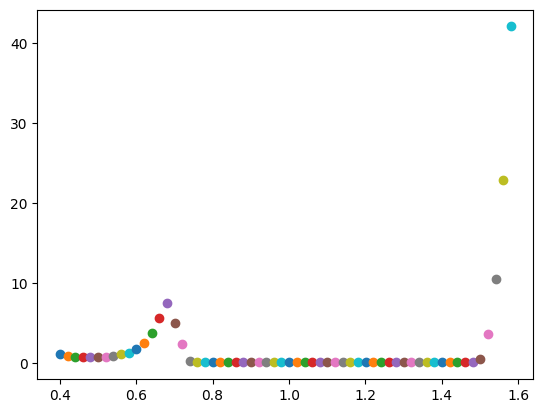

In [2]:
from classes_EIS import DataHandler, RRCRCModel,RRCRCCPEModel, FitManager,FitQuality, find_files
import matplotlib.pyplot as plt

root_folder = "100 cycles imped"
extension = ".mpr"
mpr_files = find_files(root_folder, extension)
mpr_files.sort(reverse=False)

# Define initial guesses and bounds for each 
Rs_guess = 11.
R_guess = 1.5
fs_guess = 10**1.3
n_guess = 1.
R2_guess = 6e4
fs2_guess = 10**0.5
n2_guess = 1.

initial_guess = [Rs_guess, R_guess, fs_guess,n_guess, R2_guess, fs2_guess,n2_guess]
bounds = (
    [5, 1., 10**1, 0.7, 1, 10**-1, 0.7],  # Lower bounds  (PREVIOUSLY 0.9)
    [15, 6., 10**7, 1.25, 1e8, 10**3, 1.05]  # Upper bounds
    )

# R-RC-RC model with CPE
rrcrccpe_model = RRCRCCPEModel(initial_guess, bounds)

f_min = 4; f_max = 1e6

data_handlers = [DataHandler(mpr_file) for mpr_file in mpr_files]
fit_manager = FitManager(data_handlers[0])

#fit_manager.fit_multiple_files(rrcrccpe_model, data_handlers, fmin=f_min, fmax=f_max)


for data_handler in [DataHandler(mpr_file) for mpr_file in mpr_files]:
    Ewe = data_handler.Ewe
    fit_manager = FitManager(data_handler)
    model, covariance, fit_quality = fit_manager.fit_model(rrcrccpe_model, fmin=f_min, fmax=f_max)

    plt.scatter(Ewe,model.params[5])
    #plt.scatter(Ewe,fit_quality)